In [1]:
import numpy as np
import matplotlib.pyplot as plt

Time of flight = 1.7423800000029472
Range = 21.406149240790718


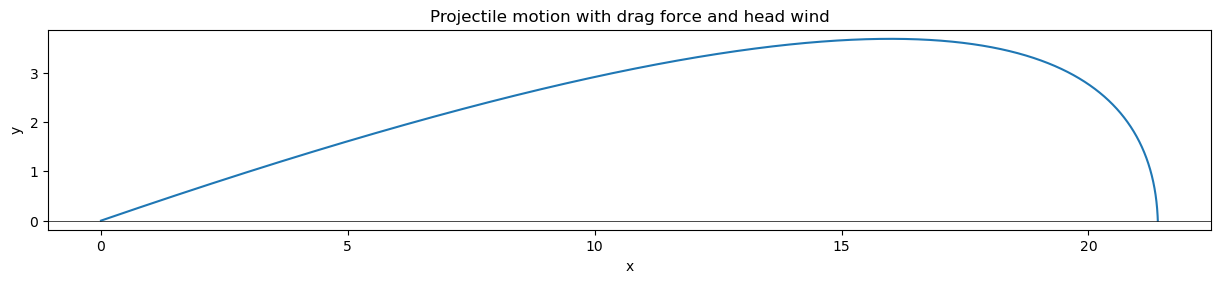

In [36]:
# Projectile motion with drag force and head wind

# Define the time step and number of points
dt = 0.00001
npts = 315000

# Define the parameters
mass = 1.0
angle =19.0*np.pi/180.0
v0 = 30.0
g = 9.80524

# Initialize the arrays
time = np.zeros(npts)
x = np.zeros(npts)
y = np.zeros(npts)
vx = np.zeros(npts)
vy = np.zeros(npts)
ax = np.zeros(npts)
ay = np.zeros(npts)

# Define the acceleration function
def a(vx, vy, t):
    global g
    ax = -10.0 - 0.5*vx
    ay = -g - 0.5*vy
    return ax, ay

# Set the initial conditions
time[0] = 0.0
x[0] = 0.0
y[0] = 0.0
vx[0] = v0*np.cos(angle)
vy[0] = v0*np.sin(angle)
ax[0], ay[0] = a(vx[0], vy[0], time[0])

# Loop over the time points, until the projectile hits the ground
for t in range(1,npts):
    # Euler Method
    
    # update time
    time[t] = time[t-1] + dt
    
    # update position
    x[t] = x[t-1] + vx[t-1]*dt
    y[t] = y[t-1] + vy[t-1]*dt
    
    # update velocity
    vx[t] = vx[t-1] + ax[t-1]*dt
    vy[t] = vy[t-1] + ay[t-1]*dt
    
    # update acceleration
    ax[t], ay[t] = a(vx[t], vy[t], time[t])
    
    # check if the projectile hits the ground
    if y[t] < 0.0:
        print('Time of flight =', time[t])
        print('Range =', x[t])
        break

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.plot(x[:t], y[:t])
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Projectile motion with drag force and head wind')

# draw horizontal line (ground)
ax.axhline(0, color='black', lw=0.5)
plt.show()